# Required Packages:

In [657]:
import sqlite3

import requests

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

# Dataframe with Voting Information - Table:

#### First, I will add the dataframe to this project.

In [658]:
df = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')

#### My original dataframe is below:

In [659]:
df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


#### Next, I will drop the unnecessary columns and limit the dataframe to movies that have received at least 10,000 votes.

In [660]:
df = df.drop(columns=['genre_ids', 'id', 'original_language','original_title', 'popularity'])

In [661]:
new_df = df[df['vote_count'] > 10000]

#### Next, I will create a new column indicating the month that each movie was released

In [662]:
highest_vote_average['release_month'] = highest_vote_average['release_date']
highest_vote_average['release_month'] = highest_vote_average['release_date'].str[5:7]

#### Finally, I will sort the dataframe by movies that received the highest rating and print the top 100 rows.

In [663]:
highest_vote_average = highest_vote_average.sort_values('vote_average', ascending = False)
highest_vote_average = highest_vote_average.head(100)

In [664]:
highest_vote_average

,release_date,title,vote_average,vote_count,release_month
4,2010-07-16,Inception,8.3,22186,07
23811,2018-04-27,Avengers: Infinity War,8.3,13948,04
11032,2014-11-05,Interstellar,8.2,18597,11
2472,1994-06-23,The Lion King,8.2,10160,06
2471,2011-07-15,Harry Potter and the Deathly Hallows: Part 2,8.1,11567,07
...,...,...,...,...,...
14193,2015-06-12,Jurassic World,6.6,14056,06
5186,2012-07-04,The Amazing Spider-Man,6.5,10411,07
11068,2014-07-25,Lucy,6.3,10019,07
17437,2016-08-05,Suicide Squad,5.9,13533,08


In [665]:
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['02'], 'Feb')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['03'], 'Mar')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['04'], 'Apr')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['05'], 'May')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['06'], 'Jun')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['07'], 'Jul')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['08'], 'Aug')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['09'], 'Sep')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['10'], 'Oct')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['11'], 'Nov')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['12'], 'Dec')

In [666]:
months_and_votes = highest_vote_average.groupby('release_month').mean()

In [667]:
months_and_votes

,vote_average,vote_count
release_month,,
Apr,8.000000,12491.000000
Aug,6.900000,15745.500000
Dec,7.636364,12431.818182
Feb,7.660000,13147.800000
Jul,7.277778,12724.111111
Jun,7.525000,12368.250000
Mar,6.900000,12482.750000
May,7.255556,13718.666667
Nov,7.472222,11386.444444


Text(0, 0.5, 'Month')

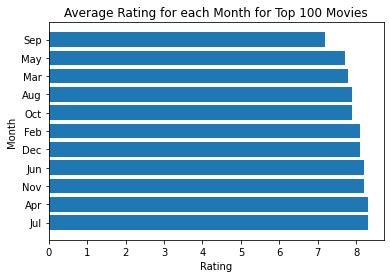

In [668]:
bar2 = plt.barh(highest_vote_average['release_month'], highest_vote_average['vote_average'])
plt.title('Average Rating for each Month for Top 100 Movies')
plt.xlabel('Rating')
plt.ylabel('Month')

In [669]:
##'SECOND TABLE'

In [670]:
highest_worldwide_gross['release_month'] = highest_worldwide_gross['release_date']
highest_worldwide_gross['release_month'] = highest_worldwide_gross['release_date'].str[0:4]

In [671]:
highest_worldwide_gross = highest_worldwide_gross.sort_values('worldwide_gross', ascending = False)
highest_worldwide_gross = highest_worldwide_gross.head(100)

In [672]:
highest_worldwide_gross

,release_date,movie,production_budget,worldwide_gross,release_month
0,"Dec 18, 2009",Avatar,425000000,2776345279,Dec
42,"Dec 19, 1997",Titanic,200000000,2208208395,Dec
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,2053311220,Dec
6,"Apr 27, 2018",Avengers: Infinity War,300000000,2048134200,Apr
33,"Jun 12, 2015",Jurassic World,215000000,1648854864,Jun
...,...,...,...,...,...
54,"May 23, 2014",X-Men: Days of Future Past,200000000,747862775,May
196,"Jun 8, 2012",Madagascar 3: Europe's Most Wanted,145000000,746921271,Jun
99,"Aug 5, 2016",Suicide Squad,175000000,746059887,Aug
52,"Jun 21, 2013",Monsters University,200000000,743588329,Jun


In [673]:
months_and_worldwide_gross = highest_worldwide_gross.drop(columns=['release_date', 'movie'])

In [674]:
months_and_worldwide_gross = highest_worldwide_gross.groupby('release_month').mean()

In [675]:
months_and_worldwide_gross

,production_budget,worldwide_gross
release_month,,
Apr,2.287500e+08,1.441139e+09
Aug,1.725000e+08,7.584637e+08
Dec,2.111538e+08,1.338565e+09
Feb,1.290000e+08,1.074642e+09
Jul,1.517500e+08,9.508027e+08
Jun,1.571000e+08,9.979005e+08
Mar,1.870000e+08,1.058936e+09
May,1.826333e+08,9.219870e+08
Nov,1.554133e+08,9.023763e+08


Text(0, 0.5, 'Month')

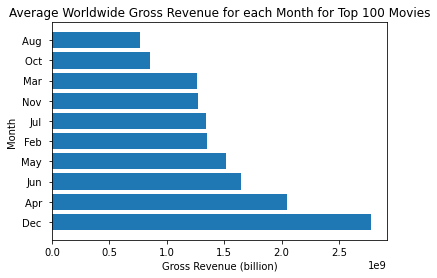

In [676]:
bar3 = plt.barh(highest_worldwide_gross['release_month'], highest_worldwide_gross['worldwide_gross'])
plt.title('Average Worldwide Gross Revenue for each Month for Top 100 Movies')
plt.xlabel('Gross Revenue (billion)')
plt.ylabel('Month')

# Dataframe with Voting Information - Bar Chart:

#### I will use my 'highest_vote_average' dataframe to create a helpful bar chart.  My bar chart is below:

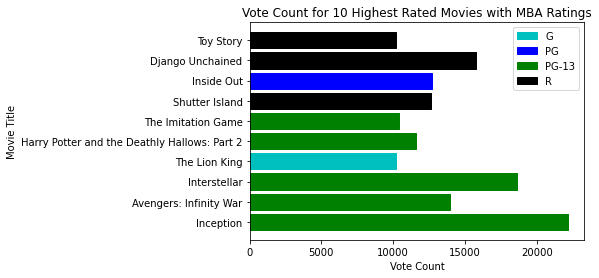

In [677]:
 bar1 = plt.barh(highest_vote_average.head(10)['title'], highest_vote_average.head(10)['vote_count'])
bar1[9].set_color('black')
bar1[8].set_color('black')
bar1[7].set_color('b')
bar1[6].set_color('black')
bar1[5].set_color('g')
bar1[4].set_color('g')
bar1[3].set_color('c')
bar1[2].set_color('g')
bar1[1].set_color('g')
bar1[0].set_color('g')
plt.title('Vote Count for 10 Highest Rated Movies with MBA Ratings')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')

cyan_patch = mpatches.Patch(color='c', label='G')
blue_patch = mpatches.Patch(color='b', label='PG')
green_patch = mpatches.Patch(color='g', label='PG-13')
black_patch = mpatches.Patch(color='black', label='R')
plt.legend(handles=[cyan_patch, blue_patch, green_patch, black_patch])

#### My bar chart shows the movies that received the highest ratings and their respective vote counts.  You can also see the mpa rating for each movie in the legend.  From my bar chart, I conclude that movies

In [678]:
df2 = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

In [679]:
df2 = df2.drop(columns=['id', 'domestic_gross'])

In [680]:
df2['production_budget'] = df2['production_budget'].astype(str)
df2['production_budget'] = df2['production_budget'].str.replace(',','').str.replace('$','').astype('int64')
df2['worldwide_gross'] = df2['worldwide_gross'].astype(str)
df2['worldwide_gross'] = df2['worldwide_gross'].str.replace(',','').str.replace('$','').astype('int64')

In [681]:
highest_worldwide_gross = df2.sort_values('worldwide_gross', ascending = False)
highest_worldwide_gross = highest_worldwide_gross.head(100)
highest_worldwide_gross

,release_date,movie,production_budget,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000,2776345279
42,"Dec 19, 1997",Titanic,200000000,2208208395
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,2053311220
6,"Apr 27, 2018",Avengers: Infinity War,300000000,2048134200
33,"Jun 12, 2015",Jurassic World,215000000,1648854864
...,...,...,...,...
54,"May 23, 2014",X-Men: Days of Future Past,200000000,747862775
196,"Jun 8, 2012",Madagascar 3: Europe's Most Wanted,145000000,746921271
99,"Aug 5, 2016",Suicide Squad,175000000,746059887
52,"Jun 21, 2013",Monsters University,200000000,743588329


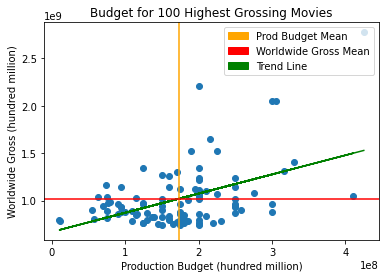

In [694]:
data = highest_worldwide_gross[['production_budget', 'worldwide_gross']]
x = data['production_budget']
y = data['worldwide_gross']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"green")

plt.title('Budget for 100 Highest Grossing Movies')
plt.xlabel('Production Budget (hundred million)')
plt.ylabel('Worldwide Gross (hundred million)')

plt.axvline(highest_worldwide_gross['production_budget'].mean(), color = 'orange')
plt.axhline(highest_worldwide_gross['worldwide_gross'].mean(), color = 'red')


mean_patch = mpatches.Patch(color='orange', label='Prod Budget Mean')
mean2_patch = mpatches.Patch(color='red', label='Worldwide Gross Mean')
trend_patch = mpatches.Patch(color='green', label='Trend Line')
plt.legend(handles=[mean_patch, mean2_patch, trend_patch])

plt.show()